In [3]:
#Importing all important libraries
import pandas as pd
import re
import numpy as np
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [4]:
df = pd.read_excel('Restaurant dataset (Cape Town).xlsx')
print(df.head())

                                  Name  Category/Cuisine  \
0                     Ground Art Caffe  Café/Coffee Shop   
1                         Jason Bakery  Café/Coffee Shop   
2  Rosetta Roastery Cafe (Bree Street)  Café/Coffee Shop   
3                   Heaven Coffee Shop  Café/Coffee Shop   
4                           The Ladder  Café/Coffee Shop   

                                       Opening Hours    Price Range  \
0  Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...  R100 - R150pp   
1  Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...  R150 - R200pp   
2  Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...   R50 - R100pp   
3  Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...   R50 - R100pp   
4  Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...  R100 - R150pp   

        Ratings/Reviews                                            Address  \
0   4.8/5 (405 reviews)       160 Strand St, De Waterkant, Cape Town, 8001   
1  4.5/5 (2000 reviews)           83 Main Rd, Green Poin

In [5]:
#Checking for missing values
print(df.isnull().sum())

Name                0
Category/Cuisine    0
Opening Hours       0
Price Range         1
Ratings/Reviews     0
Address             0
Contact Number      1
Ambiance            0
Reservations        0
Image Url           1
Image_Url2          1
dtype: int64


In [6]:
#Checking for duplicated entries in the restaurant name column to ensure there are no duplicates
duplicate_restaurant_names = df[df['Name'].duplicated(keep=False)]
print(duplicate_restaurant_names)

                      Name  Category/Cuisine  \
4               The Ladder  Café/Coffee Shop   
5             CAFE CHIFFON  Café/Coffee Shop   
6               The Ladder  Café/Coffee Shop   
7             CAFE CHIFFON  Café/Coffee Shop   
8               The Ladder  Café/Coffee Shop   
9             CAFE CHIFFON  Café/Coffee Shop   
10              The Ladder  Café/Coffee Shop   
11            CAFE CHIFFON  Café/Coffee Shop   
12            Naked coffee  Café/Coffee Shop   
13             Halō Coffee  Café/Coffee Shop   
14            Naked coffee  Café/Coffee Shop   
15             Halō Coffee  Café/Coffee Shop   
16            Naked coffee  Café/Coffee Shop   
17             Halō Coffee  Café/Coffee Shop   
18            Naked coffee  Café/Coffee Shop   
19             Halō Coffee  Café/Coffee Shop   
20            Naked coffee  Café/Coffee Shop   
21             Halō Coffee  Café/Coffee Shop   
22      Belly of the beast       Fine Dining   
23          Fyn Restaurant       Fine Di

In [7]:
#Dropping duplicates 
df = df.drop_duplicates(subset=['Name', 'Category/Cuisine'], keep='first')
df = df.drop_duplicates(subset=['Name'], keep='first')  
#Checking for duplicated entries in the restaurant name column to ensure there are no duplicates
duplicate_restaurant_names = df[df['Name'].duplicated(keep=False)]
print(duplicate_restaurant_names)

Empty DataFrame
Columns: [Name, Category/Cuisine, Opening Hours, Price Range, Ratings/Reviews, Address, Contact Number, Ambiance, Reservations, Image Url, Image_Url2]
Index: []


In [8]:
df.rename(columns={'Name': 'Restaurant Name'}, inplace=True)
print(df['Restaurant Name'])

0                         Ground Art Caffe
1                             Jason Bakery
2      Rosetta Roastery Cafe (Bree Street)
3                       Heaven Coffee Shop
4                               The Ladder
                      ...                 
107           Posticino Italian Restaurant
108                           The Foodbarn
109                              Aubergine
110              Chefs Warehouse at Maison
111                      La Petite Colombe
Name: Restaurant Name, Length: 92, dtype: object


In [9]:
df.rename(columns={'Ratings/Reviews': 'Ratings'}, inplace=True)
print(df['Ratings'])

0       4.8/5 (405 reviews)
1      4.5/5 (2000 reviews)
2       4.7/5 (704 reviews)
3         4.7/5 (197 views)
4       4.6/5 (489 reviews)
               ...         
107    4.4/5 (2007 reviews)
108    4.6/5 (1179 reviews)
109     4.5/5 (495 reviews)
110     4.5/5 (706 reviews)
111     4.8/5 (993 reviews)
Name: Ratings, Length: 92, dtype: object


In [10]:
#Extracting restaurant rating and number of reviews to create new columns 'Rating_value' and 'Review_count'
def extract_rating_reviews(value):
    match = re.search(r'(\d\.\d)/5', str(value))  
    reviews_match = re.search(r'\((\d+) reviews\)', str(value))  
    rating = float(match.group(1)) if match else None
    reviews = int(reviews_match.group(1)) if reviews_match else None
    return rating, reviews

df[['Rating_Value', 'Review_Count']] = df['Ratings'].apply(lambda x: pd.Series(extract_rating_reviews(x)))
df.drop(columns=['Ratings'], inplace=True)
df.head()

,Restaurant Name,Category/Cuisine,Opening Hours,Price Range,Address,Contact Number,Ambiance,Reservations,Image Url,Image_Url2,Rating_Value,Review_Count
0,Ground Art Caffe,Café/Coffee Shop,Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...,R100 - R150pp,"160 Strand St, De Waterkant, Cape Town, 8001",214181331,Ground Art Caffe is a casual cafe in De Waterk...,Not Required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.8,405.0
1,Jason Bakery,Café/Coffee Shop,Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...,R150 - R200pp,"83 Main Rd, Green Point, Cape Town, 8005",214330538,Jason Bakery in Cape Town is a beloved spot th...,Not Required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.5,2000.0
2,Rosetta Roastery Cafe (Bree Street),Café/Coffee Shop,Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...,R50 - R100pp,"101 Bree St, CBD, Cape Town, 8001",214474099,Rosetta Roastery Café on Bree Street in Cape T...,Not Required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.7,704.0
3,Heaven Coffee Shop,Café/Coffee Shop,Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...,R50 - R100pp,"38 Burg St, Cape Town City Centre, Cape Town, ...",728842057,"Heaven Coffee Shop, nestled inside the stunnin...",Not Required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.7,NaN
4,The Ladder,Café/Coffee Shop,Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...,R100 - R150pp,"136 Bree St, Cape Town City Centre, Cape Town,...",824511572,"The Ladder on Bree Street is a trendy, bustlin...",Not Required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.6,489.0


In [11]:
#Checking for missing values in the 'Rating_Value' and 'Review_Count'column
print(df['Rating_Value'].isnull().sum())
print(df['Review_Count'].isnull().sum())

0
2


In [12]:
missing_reviews = df[df['Review_Count'].isnull()]
print(missing_reviews)

        Restaurant Name  Category/Cuisine  \
3    Heaven Coffee Shop  Café/Coffee Shop   
104         Magica Roma           Italian   

                                         Opening Hours    Price Range  \
3    Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...   R50 - R100pp   
104  Tuesday 12–2 pm, 6–9 pm\nWednesday 12–2 pm, 6–...  R150 - R250pp   

                                               Address Contact Number  \
3    38 Burg St, Cape Town City Centre, Cape Town, ...      728842057   
104                          Central Square, Pinelands      215311489   

                                              Ambiance  Reservations  \
3    Heaven Coffee Shop, nestled inside the stunnin...  Not Required   
104  Traditional Italian restaurant with a cozy, in...     215311489   

                                             Image Url  \
3    <blockquote class="instagram-media" data-instg...   
104  <blockquote class="instagram-media" data-instg...   

                                

In [13]:
df.loc[df['Restaurant Name'] == 'Heaven Coffee Shop', 'Review_Count'] = 210
df.loc[df['Restaurant Name'] == 'Magica Roma', 'Review_Count'] = 1393
print(df['Review_Count'].isnull().sum())

0


In [14]:
#Normalizing Rating_Value for machine learning model use
# Initialize MinMaxScaler
scaler = MinMaxScaler()
df["Rating_Value_Normalized"] = scaler.fit_transform(df[["Rating_Value"]])
print(df['Rating_Value_Normalized'])

0      0.666667
1      0.166667
2      0.500000
3      0.500000
4      0.333333
         ...   
107    0.000000
108    0.333333
109    0.166667
110    0.166667
111    0.666667
Name: Rating_Value_Normalized, Length: 92, dtype: float64


In [15]:
#Normalizing 'Review_Count' for future machine learning model work
print(df['Review_Count'])
scaler = MinMaxScaler()
df["Review_Count_Normalized"] = scaler.fit_transform(df[["Review_Count"]])
print(df["Review_Count_Normalized"])

0       405.0
1      2000.0
2       704.0
3       210.0
4       489.0
        ...  
107    2007.0
108    1179.0
109     495.0
110     706.0
111     993.0
Name: Review_Count, Length: 92, dtype: float64
0      0.119040
1      0.636393
2      0.216023
3      0.055790
4      0.146286
         ...   
107    0.638664
108    0.370094
109    0.148232
110    0.216672
111    0.309763
Name: Review_Count_Normalized, Length: 92, dtype: float64


In [16]:
#Feature Engineering: Extracting minimum price range per person and max price range per person from 'Price Range' column
def extract_price_range(value):
    match = re.findall(r'\d+', str(value))  

    if "R" in str(value) and "+" in str(value):  
        return int(match[0]), 1000  

    elif len(match) == 2: 
        return int(match[0]), int(match[1])  

    elif len(match) == 1:  
        return int(match[0]), int(match[0])  

    else:
        return None, None  

df[['Avg_Min_Price', 'Avg_Max_Price']] = df['Price Range'].apply(lambda x: pd.Series(extract_price_range(x)))
df.drop(columns=['Price Range'], inplace=True)
print(df.head())

                       Restaurant Name  Category/Cuisine  \
0                     Ground Art Caffe  Café/Coffee Shop   
1                         Jason Bakery  Café/Coffee Shop   
2  Rosetta Roastery Cafe (Bree Street)  Café/Coffee Shop   
3                   Heaven Coffee Shop  Café/Coffee Shop   
4                           The Ladder  Café/Coffee Shop   

                                       Opening Hours  \
0  Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...   
1  Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...   
2  Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...   
3  Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...   
4  Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...   

                                             Address Contact Number  \
0       160 Strand St, De Waterkant, Cape Town, 8001      214181331   
1           83 Main Rd, Green Point, Cape Town, 8005      214330538   
2                  101 Bree St, CBD, Cape Town, 8001      214474099   
3  38 Burg St, Cap

In [17]:
print(df['Avg_Min_Price'].isnull().sum())
print(df['Avg_Max_Price'].isnull().sum())

1
1


In [18]:
df = df.dropna(subset=['Avg_Max_Price'])

In [19]:
print(df['Avg_Min_Price'].isnull().sum())
print(df['Avg_Max_Price'].isnull().sum())

0
0


In [20]:
#Normalizing the 'Avg_Min_Price' and 'Avg_Max_Price' for future machine learning model work
scaler = MinMaxScaler()
df["Avg_Min_Price_Normalized"] = scaler.fit_transform(df[["Avg_Min_Price"]])
print(df['Avg_Min_Price_Normalized'])
df["Avg_Max_Price_Normalized"] = scaler.fit_transform(df[["Avg_Max_Price"]])
print(df['Avg_Max_Price_Normalized'])

0      0.066667
1      0.133333
2      0.000000
3      0.000000
4      0.066667
         ...   
107    0.093333
108    0.200000
109    0.600000
110    0.600000
111    1.000000
Name: Avg_Min_Price_Normalized, Length: 91, dtype: float64
0      0.093960
1      0.127517
2      0.060403
3      0.060403
4      0.093960
         ...   
107    0.194631
108    0.194631
109    0.664430
110    0.664430
111    0.798658
Name: Avg_Max_Price_Normalized, Length: 91, dtype: float64


In [21]:
#Applying One-Hot Encoding to 'Reservations' column to ensure its effective use in machine learning model
def is_reservation_required(reservation):
    reservation = str(reservation) if not isinstance(reservation, str) else reservation
    
    if 'http' in reservation or reservation.isnumeric() or '@' in reservation:
        return 1  
    elif 'not required' in reservation.lower():
        return 0  
    return 0  

df['ReservationRequired'] = df['Reservations'].apply(is_reservation_required)
print(df['ReservationRequired'])

0      0
1      0
2      0
3      0
4      0
      ..
107    1
108    1
109    1
110    1
111    1
Name: ReservationRequired, Length: 91, dtype: int64


In [30]:
def extract_suburb_improved(address):
    cape_town_match = re.search(r',\s([^,]+),\sCape Town', address)
    if cape_town_match:
        return cape_town_match.group(1).strip()
    
    components = [comp.strip() for comp in address.split(',')]
    if len(components) >= 2:
        last_comp = components[-1].strip()
        if re.match(r'^\d{4,5}$', last_comp):  
            return components[-2].strip()
        else:
            return components[-1].strip()
    

    for comp in reversed(components):
        comp = comp.strip()
        # Skip components that look like street addresses or postal codes
        if re.match(r'^\d+\s|^P\.?O\.?|^Street|^St$|^Road|^Rd$|^Ave|^\d{4,5}$', comp, re.IGNORECASE):
            continue
        return comp
    # If no suburb found, check if there's a standalone name after the last comma
    standalone = re.search(r',\s*([A-Za-z\s]+)$', address)
    if standalone:
        return standalone.group(1).strip()
            
    return None

# Applying the improved function to the dataframe
df['Suburb'] = df['Address'].apply(extract_suburb_improved)
print(df['Suburb'].isnull().sum())
print(df['Suburb'])

0
0               De Waterkant
1                Green Point
2                        CBD
3      Cape Town City Centre
4      Cape Town City Centre
               ...          
107                Sea Point
108                Noordhoek
109                  Gardens
110              Franschhoek
111              Franschhoek
Name: Suburb, Length: 91, dtype: object


In [31]:
# Replacing all instances of 'CBD' with 'Cape Town City Centre'
df['Suburb'] = df['Suburb'].replace('CBD', 'Cape Town City Centre')
print(df[['Address', 'Suburb']])

                                               Address                 Suburb
0         160 Strand St, De Waterkant, Cape Town, 8001           De Waterkant
1             83 Main Rd, Green Point, Cape Town, 8005            Green Point
2                    101 Bree St, CBD, Cape Town, 8001  Cape Town City Centre
3    38 Burg St, Cape Town City Centre, Cape Town, ...  Cape Town City Centre
4    136 Bree St, Cape Town City Centre, Cape Town,...  Cape Town City Centre
..                                                 ...                    ...
107            323 Main Rd, Sea Point, Cape Town, 8060              Sea Point
108  Noordhoek Farm Village, Noordhoek, Cape Town 7979              Noordhoek
109                              39 Barnet St, Gardens                Gardens
110                             R45, Franschhoek, 7690            Franschhoek
111           Leeu Estates, Dassenberg Rd, Franschhoek            Franschhoek

[91 rows x 2 columns]


In [32]:
df['Suburb'].isnull().sum()

np.int64(0)

In [33]:
print(df['Suburb'].to_list())

['De Waterkant', 'Green Point', 'Cape Town City Centre', 'Cape Town City Centre', 'Cape Town City Centre', 'Green Point', 'Sea Point', '117 Strand St', 'Cape Town City Centre', '37 Parliament St', 'Gardens', 'Bowl', 'Croydon', 'Cape Town City Centre', 'Salt River', 'Victoria & Alfred Waterfront', 'Constantia Neck', 'District Six', 'Observatory', 'Constantia Nek', 'Constantia', 'Green Point', 'Cape Town City Centre', 'District Six', 'Cape Town City Centre', 'Sea Point', 'Sea Point', 'Cape Town City Centre', 'Gardens', 'Green Point', 'Green Point', 'Sea Point', 'Observatory', 'Sea Point', 'Sea Point', 'Observatory', 'Cape Town City Centre', 'Gardens', 'Victoria & Alfred Waterfront', 'Claremont', 'Cape Town City Centre', 'Newlands', 'Observatory', 'Cape Town City Centre', 'Victoria & Alfred Waterfront', '14 Long St', 'Sea Point', '59 Heerengracht St', 'Cape Town City Centre', 'Green Point', '71 Buitengracht St', 'Tyger Waterfront', 'Cape Town', 'Cape Town City Centre', 'Green Point', 'Gar

In [34]:
print(df['Address'].to_list())

['160 Strand St, De Waterkant, Cape Town, 8001', '83 Main Rd, Green Point, Cape Town, 8005', '101 Bree St, CBD, Cape Town, 8001', '38 Burg St, Cape Town City Centre, Cape Town, 8000', '136 Bree St, Cape Town City Centre, Cape Town, 8001\n', 'SHOGF007, Old Cape Quarter, 72 Waterkant St, Green Point, Cape Town, 8001', '2 Wisbeach Rd, Sea Point, Cape Town, 8060', '\xa0In the foyer of, 117 Strand St, Cape Town City Centre, Cape Town, 8001', '110 Harrington St, Cape Town City Centre, Cape Town, 8000', '5th Floor, Speakers Corner, 37 Parliament St, Cape Town City Centre, Cape Town, 8001', '39 Barnet St, Gardens, Cape Town, 8001', '\xa0Pierhead Building (next to the NSRI V&A Waterfront, Bowl, Cape Town, 8001', 'Faure Village Rd, Croydon, Cape Town, 7130', '58 Wale St, Cape Town City Centre, Cape Town, 8000', '100 Voortrekker Rd, Salt River, Cape Town, 7925', 'Pierhead Building (next to the NSRI, Victoria & Alfred Waterfront, Cape Town, 800', 'Beau Constantia Wine Farm, 1043 Constantia Main Ro

In [36]:
suburb_corrections = {
    '117 Strand St': 'De Waterkant',
    '37 Parliament St': 'Cape Town City Centre',
    'Bowl': 'Victoria & Alfred Waterfront',
    'Constantia Neck': 'Constantia',
    'Constantia Nek': 'Constantia',
    '14 Long St': 'Cape Town City Centre',
    '59 Heerengracht St': 'Cape Town City Centre',
    '71 Buitengracht St': 'Cape Town City Centre',
    'Tyger Waterfront': 'Bellville',
    'Hartfield Village': 'Mowbray',
    '邮政编码: 8060': 'Sea Point',
    'Upper Canterbury St': 'Gardens'
}

# Apply corrections to the Suburb column
df['Suburb'] = df['Suburb'].replace(suburb_corrections)


In [37]:
print(df['Suburb'].to_list())

['De Waterkant', 'Green Point', 'Cape Town City Centre', 'Cape Town City Centre', 'Cape Town City Centre', 'Green Point', 'Sea Point', 'De Waterkant', 'Cape Town City Centre', 'Cape Town City Centre', 'Gardens', 'Victoria & Alfred Waterfront', 'Croydon', 'Cape Town City Centre', 'Salt River', 'Victoria & Alfred Waterfront', 'Constantia', 'District Six', 'Observatory', 'Constantia', 'Constantia', 'Green Point', 'Cape Town City Centre', 'District Six', 'Cape Town City Centre', 'Sea Point', 'Sea Point', 'Cape Town City Centre', 'Gardens', 'Green Point', 'Green Point', 'Sea Point', 'Observatory', 'Sea Point', 'Sea Point', 'Observatory', 'Cape Town City Centre', 'Gardens', 'Victoria & Alfred Waterfront', 'Claremont', 'Cape Town City Centre', 'Newlands', 'Observatory', 'Cape Town City Centre', 'Victoria & Alfred Waterfront', 'Cape Town City Centre', 'Sea Point', 'Cape Town City Centre', 'Cape Town City Centre', 'Green Point', 'Cape Town City Centre', 'Bellville', 'Cape Town', 'Cape Town City

In [38]:
df = pd.get_dummies(df, columns=['Suburb'], prefix='Suburb', dtype=int)
print(df.head(5))

                       Restaurant Name  Category/Cuisine  \
0                     Ground Art Caffe  Café/Coffee Shop   
1                         Jason Bakery  Café/Coffee Shop   
2  Rosetta Roastery Cafe (Bree Street)  Café/Coffee Shop   
3                   Heaven Coffee Shop  Café/Coffee Shop   
4                           The Ladder  Café/Coffee Shop   

                                       Opening Hours  \
0  Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...   
1  Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...   
2  Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...   
3  Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...   
4  Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...   

                                             Address Contact Number  \
0       160 Strand St, De Waterkant, Cape Town, 8001      214181331   
1           83 Main Rd, Green Point, Cape Town, 8005      214330538   
2                  101 Bree St, CBD, Cape Town, 8001      214474099   
3  38 Burg St, Cap

In [39]:
print(df['Contact Number'])

0      214181331
1      214330538
2      214474099
3      728842057
4      824511572
         ...    
107    214394014
108    217891390
109    214650000
110    218762116
111    212023395
Name: Contact Number, Length: 91, dtype: object


In [40]:
#converting contact number to correct format, fixing inconsistent formatting
def clean_phone_number(number):
    if pd.isna(number) or number == "Not Available":  
        return number  

    number = re.sub(r'[^\d+]', '', str(number))

    if number.startswith("0"):
        number = "+27" + number[1:]

    elif len(number) == 9:
        number = "+27" + number

    if number.startswith("+27") and len(number) >= 11:
        formatted_number = "+27 " + number[3:5] + " " + number[5:8] + " " + number[8:]
        return formatted_number
    
    return number  


df["Contact Number"] = df["Contact Number"].apply(clean_phone_number)
print(df['Contact Number'])

0      +27 21 418 1331
1      +27 21 433 0538
2      +27 21 447 4099
3      +27 72 884 2057
4      +27 82 451 1572
            ...       
107    +27 21 439 4014
108    +27 21 789 1390
109    +27 21 465 0000
110    +27 21 876 2116
111    +27 21 202 3395
Name: Contact Number, Length: 91, dtype: object


In [41]:
missing_data = df[df['Contact Number'].isnull()]
print(missing_data)

                          Restaurant Name Category/Cuisine  \
48  Pauline's Greenpoint @Goodman Gallery             Café   

                                        Opening Hours  \
48  Wednesday 7:30 am–4 pm\nThursday 7:30 am–4 pm\...   

                                          Address Contact Number  \
48  37A Somerset Rd, Green Point, Cape Town, 8051            NaN   

                                             Ambiance  Reservations  \
48  A chic and artistic café located in a gallery ...  Not Required   

                                            Image Url  \
48  <blockquote class="instagram-media" data-instg...   

                                           Image_Url2  Rating_Value  ...  \
48  <blockquote class="instagram-media" data-instg...           4.8  ...   

    Suburb_Newlands  Suburb_Noordhoek  Suburb_Observatory  Suburb_Pinelands  \
48                0                 0                   0                 0   

    Suburb_Salt River  Suburb_Sea Point  Suburb_Simon

In [42]:
df.loc[48, 'Contact Number'] = "021 462 7573"
df['Contact Number'] = df['Contact Number'].apply(clean_phone_number)
print(df['Contact Number'].isnull().sum())

0


In [43]:
def check_phone_formats(df):
    correct_pattern = r'^\+27\s\d{2}\s\d{3}\s\d{4}$'
    
    invalid_mask = (~df["Contact Number"].str.match(correct_pattern, na=False)) & (df["Contact Number"] != "Not Available") & (~df["Contact Number"].isna())
    
    invalid_numbers = df.loc[invalid_mask, "Contact Number"]
    
    print(f"Found {len(invalid_numbers)} contact numbers with invalid format:")
    
    # Printing the invalid numbers with their indices for easy reference
    for idx, number in invalid_numbers.items():
        print(f"Row {idx}: {number}")
    
    return invalid_mask

invalid_mask = check_phone_formats(df)

Found 0 contact numbers with invalid format:


In [44]:
#Converting all entries in the 'Category/Cuisine' column to lowercase
df['Category/Cuisine'] = df['Category/Cuisine'].str.lower()
print(df['Category/Cuisine'])

0      café/coffee shop
1      café/coffee shop
2      café/coffee shop
3      café/coffee shop
4      café/coffee shop
             ...       
107             italian
108              french
109              french
110              french
111              french
Name: Category/Cuisine, Length: 91, dtype: object


In [45]:
df['Category/Cuisine'] = df['Category/Cuisine'].str.strip()
df['Category/Cuisine'] = df['Category/Cuisine'].str.replace(r'\s+', ' ', regex=True)
print(df['Category/Cuisine'])

0      café/coffee shop
1      café/coffee shop
2      café/coffee shop
3      café/coffee shop
4      café/coffee shop
             ...       
107             italian
108              french
109              french
110              french
111              french
Name: Category/Cuisine, Length: 91, dtype: object


In [46]:
df['Category/Cuisine'] = df['Category/Cuisine'].str.replace('/', ',')
print(df['Category/Cuisine'])

0      café,coffee shop
1      café,coffee shop
2      café,coffee shop
3      café,coffee shop
4      café,coffee shop
             ...       
107             italian
108              french
109              french
110              french
111              french
Name: Category/Cuisine, Length: 91, dtype: object


In [47]:
def split_and_one_hot_encode(df, column_name):
    """Splits values in the specified column by commas and performs one-hot encoding."""
    
    # Split categories and convert to list format
    df[column_name] = df[column_name].apply(
        lambda x: [cat.strip().lower() for cat in x.split(',')] if isinstance(x, str) else []
    )
    
    df = df.explode(column_name)
    
    # Perform one-hot encoding
    df = pd.get_dummies(df, columns=[column_name], prefix='', prefix_sep='')
 
    df = df.groupby(df.index).max()
    
    return df

df = split_and_one_hot_encode(df, 'Category/Cuisine')
print(df)

                         Restaurant Name  \
0                       Ground Art Caffe   
1                           Jason Bakery   
2    Rosetta Roastery Cafe (Bree Street)   
3                     Heaven Coffee Shop   
4                             The Ladder   
..                                   ...   
107         Posticino Italian Restaurant   
108                         The Foodbarn   
109                            Aubergine   
110            Chefs Warehouse at Maison   
111                    La Petite Colombe   

                                         Opening Hours  \
0    Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...   
1    Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...   
2    Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...   
3    Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...   
4    Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...   
..                                                 ...   
107                             Mon-Sun: 12:30 - 22:00   
108  We

In [68]:
# Converting boolean columns to '1' and '0' as strings
df = df.applymap(lambda x: '1' if x is True else ('0' if x is False else x))

print(df.head(5))

                       Restaurant Name  \
0                     Ground Art Caffe   
1                         Jason Bakery   
2  Rosetta Roastery Cafe (Bree Street)   
3                   Heaven Coffee Shop   
4                           The Ladder   

                                       Opening Hours  \
0  Monday 07:00-15:00; Tuesday 07:00-15:00; Wedne...   
1  Tuesday 07:00-15:00; Wednesday 07:00-15:00; Th...   
2  Monday 07:00-16:00; Tuesday 07:00-16:00; Wedne...   
3  Tuesday 07:00-17:00; Wednesday 07:00-17:00; Th...   
4  Tuesday 07:00-16:00; Wednesday 07:00-16:00; Th...   

                                             Address   Contact Number  \
0       160 Strand St, De Waterkant, Cape Town, 8001  +27 21 418 1331   
1           83 Main Rd, Green Point, Cape Town, 8005  +27 21 433 0538   
2                  101 Bree St, CBD, Cape Town, 8001  +27 21 447 4099   
3  38 Burg St, Cape Town City Centre, Cape Town, ...  +27 72 884 2057   
4  136 Bree St, Cape Town City Centre, Cape T

C:\Users\Game\AppData\Local\Temp\ipykernel_8276\792568706.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: '1' if x is True else ('0' if x is False else x))


In [48]:
#Standardizing Restaurant Name Column
df['Restaurant Name'] = df['Restaurant Name'].str.strip()  # Remove leading/trailing spac
df['Restaurant Name'] = df['Restaurant Name'].str.replace(r"\n", " ", regex=True)  # Remove newline characters
df['Restaurant Name'] = df['Restaurant Name'].str.title()  # Capitalize each word
print(df['Restaurant Name'])

0                         Ground Art Caffe
1                             Jason Bakery
2      Rosetta Roastery Cafe (Bree Street)
3                       Heaven Coffee Shop
4                               The Ladder
                      ...                 
107           Posticino Italian Restaurant
108                           The Foodbarn
109                              Aubergine
110              Chefs Warehouse At Maison
111                      La Petite Colombe
Name: Restaurant Name, Length: 91, dtype: object


In [49]:
print(df['Opening Hours'])

0      Monday 7 am–3 pm\nTuesday 7 am–3 pm\nWednesday...
1      Tuesday 7 am–3 pm\nWednesday 7 am–3 pm\nThursd...
2      Monday 7 am–4 pm\nTuesday 7 am–4 pm\nWednesday...
3      Tuesday 7 am–5 pm\nWednesday 7 am–5 pm\nThursd...
4      Tuesday 7 am–4 pm\nWednesday 7 am–4 pm\nThursd...
                             ...                        
107                               Mon-Sun: 12:30 - 22:00
108    Wednesday 8 am–9:30 pm\nThursday 8 am–9:30 pm\...
109    Wednesday 6–10 pm\nThursday 12–2 pm, 6–10 pm\n...
110    Wednesday 12–9 pm\nThursday 12–9 pm\nFriday 12...
111    Thursday 12–10 pm\nFriday 12–10 pm\nSaturday 1...
Name: Opening Hours, Length: 91, dtype: object


In [50]:
def clean_times(text):
    # Replace line breaks with commas for cleaner formatting
    text = text.replace("\n", "; ")
    return text
df["Opening Hours"] = df["Opening Hours"].apply(clean_times)
print(df['Opening Hours'])

0      Monday 7 am–3 pm; Tuesday 7 am–3 pm; Wednesday...
1      Tuesday 7 am–3 pm; Wednesday 7 am–3 pm; Thursd...
2      Monday 7 am–4 pm; Tuesday 7 am–4 pm; Wednesday...
3      Tuesday 7 am–5 pm; Wednesday 7 am–5 pm; Thursd...
4      Tuesday 7 am–4 pm; Wednesday 7 am–4 pm; Thursd...
                             ...                        
107                               Mon-Sun: 12:30 - 22:00
108    Wednesday 8 am–9:30 pm; Thursday 8 am–9:30 pm;...
109    Wednesday 6–10 pm; Thursday 12–2 pm, 6–10 pm; ...
110    Wednesday 12–9 pm; Thursday 12–9 pm; Friday 12...
111    Thursday 12–10 pm; Friday 12–10 pm; Saturday 1...
Name: Opening Hours, Length: 91, dtype: object


In [51]:
# Dictionary to map various day formats to standard full names
day_mapping = {
    "Mon": "Monday", "Tue": "Tuesday", "Wed": "Wednesday", "Thu": "Thursday", "Thur": "Thursday", "Fri": "Friday",
    "Sat": "Saturday", "Sun": "Sunday"
}

# Function to standardize day formats
def standardize_days(text):
    # Replacing short forms with full names
    for short, full in day_mapping.items():
        text = re.sub(rf"\b{short}\b", full, text)  # \b ensures only full word matches
    
    return text

df["Opening Hours"] = df["Opening Hours"].apply(standardize_days)

print(df['Opening Hours'])

0      Monday 7 am–3 pm; Tuesday 7 am–3 pm; Wednesday...
1      Tuesday 7 am–3 pm; Wednesday 7 am–3 pm; Thursd...
2      Monday 7 am–4 pm; Tuesday 7 am–4 pm; Wednesday...
3      Tuesday 7 am–5 pm; Wednesday 7 am–5 pm; Thursd...
4      Tuesday 7 am–4 pm; Wednesday 7 am–4 pm; Thursd...
                             ...                        
107                         Monday-Sunday: 12:30 - 22:00
108    Wednesday 8 am–9:30 pm; Thursday 8 am–9:30 pm;...
109    Wednesday 6–10 pm; Thursday 12–2 pm, 6–10 pm; ...
110    Wednesday 12–9 pm; Thursday 12–9 pm; Friday 12...
111    Thursday 12–10 pm; Friday 12–10 pm; Saturday 1...
Name: Opening Hours, Length: 91, dtype: object


In [52]:
def convert_to_24_hour(time_str):
    match = re.match(r"(\d{1,2}):?(\d{0,2})?\s?(am|pm)?", time_str, re.IGNORECASE)
    if match:
        hours, minutes, period = match.groups()
        hours = int(hours)
        minutes = minutes if minutes else "00"  # Default missing minutes to ":00"

        # Convert to 24-hour format
        if period:
            if period.lower() == "pm" and hours != 12:
                hours += 12
            elif period.lower() == "am" and hours == 12:
                hours = 0
        return f"{hours:02d}:{minutes.zfill(2)}"  # Ensures HH:MM format
    return time_str  # Return as is if no match

def clean_times(text):
    def replace_time_range(match):
        start_time_str = match.group(1)
        end_time_str = match.group(2)
        start_time = convert_to_24_hour(start_time_str)
        end_time = convert_to_24_hour(end_time_str)
        return f"{start_time}-{end_time}"
        
    # Converting AM/PM times within ranges
    text = re.sub(r"(\d{1,2}:?\d{0,2}\s?(?:am|pm)?)\s*[–-]\s*(\d{1,2}:?\d{0,2}\s?(?:am|pm)?)", replace_time_range, text, flags=re.IGNORECASE)

    # Ensuring missing minutes in 24-hour times are set to :00
    text = re.sub(r"(\d{1,2})[–-](\d{2}:\d{2})", r"\1:00-\2", text)
    text = re.sub(r"(\d{1,2})[–-](\d{1,2})", r"\1:00-\2:00", text)

    # Removing extra seconds
    text = re.sub(r"(\d{2}:\d{2}):\d{2}", r"\1", text)

    # Removing unnecessary brackets
    text = text.replace("(", "").replace(")", "")

    # Replacing line breaks with commas for cleaner formatting
    text = text.replace("\n", "; ")

    return text

df["Opening Hours"] = df["Opening Hours"].apply(clean_times)
print(df['Opening Hours'])

0      Monday 07:00:00-15:00; Tuesday 07:00:00-15:00;...
1      Tuesday 07:00:00-15:00; Wednesday 07:00:00-15:...
2      Monday 07:00:00-16:00; Tuesday 07:00:00-16:00;...
3      Tuesday 07:00:00-17:00; Wednesday 07:00:00-17:...
4      Tuesday 07:00:00-16:00; Wednesday 07:00:00-16:...
                             ...                        
107                        Monday-Sunday: 12:30:00-22:00
108    Wednesday 08:00:00-21:00; Thursday 08:00:00-21...
109    Wednesday 06:00:00-22:00; Thursday 12:00:00-14...
110    Wednesday 12:00:00-21:00; Thursday 12:00:00-21...
111    Thursday 12:00:00-22:00; Friday 12:00:00-22:00...
Name: Opening Hours, Length: 91, dtype: object


In [53]:
df['Opening Hours'] = df['Opening Hours'].str.replace(r'(\d{2}:\d{2}):00', r'\1', regex=True)
print(df['Opening Hours'])

0      Monday 07:00-15:00; Tuesday 07:00-15:00; Wedne...
1      Tuesday 07:00-15:00; Wednesday 07:00-15:00; Th...
2      Monday 07:00-16:00; Tuesday 07:00-16:00; Wedne...
3      Tuesday 07:00-17:00; Wednesday 07:00-17:00; Th...
4      Tuesday 07:00-16:00; Wednesday 07:00-16:00; Th...
                             ...                        
107                           Monday-Sunday: 12:30-22:00
108    Wednesday 08:00-21:00; Thursday 08:00-21:00; F...
109    Wednesday 06:00-22:00; Thursday 12:00-14:00, 0...
110    Wednesday 12:00-21:00; Thursday 12:00-21:00; F...
111    Thursday 12:00-22:00; Friday 12:00-22:00; Satu...
Name: Opening Hours, Length: 91, dtype: object


In [54]:
print(df['Ambiance'].isnull().sum())

0


In [55]:
# Function to preprocess text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define stopwords
custom_stopwords = [
    'a', 'an', 'the', 'and', 'but', 'or', 'for', 'nor', 'on', 'at', 'to', 'by', 
    'from', 'this', 'that', 'in', 'of', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could', 'will',
    'would', 'should', 'shall', 'may', 'might', 'must', 'with', 'within', 'its',
    'it', 'restaurant', 'offers', 'featuring', 'known', 'which', 'where',
    'serving', 'meals', 'great', 'making', 'high quality', 'offering', 
    'their', 'set', 'menu', 'point', 'delicious', 'focus', 'lovers', 'cape', 'cape town', 
    'bree', 'yet', 'bree street', 'high', 'quality', 'street', 'town',
]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)

# Vectorizing without TF-IDF (pure word frequency)
count_vectorizer = CountVectorizer(
    stop_words=custom_stopwords, 
    max_features=100,  
    ngram_range=(1, 2)  
)
count_matrix = count_vectorizer.fit_transform(df['Ambiance'].apply(preprocess_text))

# LDA Topic Modeling 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  
lda.fit(count_matrix)

# Extract Top Words for Each Topic
feature_names = count_vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics[f'Topic {topic_idx+1}'] = top_keywords

for topic, keywords in topics.items():
    print(f"{topic}: {', '.join(keywords)}")
    

Topic 1: italian, cozy, dishes, charming, relaxed, welcoming, setting, ambiance, vibe, warm
Topic 2: dining, experience, chic, modern, sushi, dishes, dining experience, elegant, aesthetic, atmosphere
Topic 3: experience, dining, exceptional, dining experience, steaks, memorable, sophisticated, culinary, fine, located
Topic 4: fresh, contemporary, perfect, spot, vibrant, casual, lively, flavors, vibe, trendy
Topic 5: coffee, café, perfect, spot, atmosphere, youre, whether youre, whether, warm, vibrant


In [56]:
# Assign topic distributions
topic_distributions = lda.transform(count_matrix)

# Assign dominant topic to each restaurant
df['Ambiance_Category'] = topic_distributions.argmax(axis=1)  # Assign dominant topic

# Map topic numbers to theme labels
ambiance_labels = {
    0: "Cozy Italian Dining & Warm Ambiance",
    1: "Chic & Elegant Modern Dining",
    2: "Sophisticated Fine Dining & Exceptional Steaks",
    3: "Trendy & Vibrant Casual Dining",
    4: "Casual Café & Cozy Coffee Spot"
}

# Assign the corresponding theme label to each restaurant
df['Ambiance_Label'] = df['Ambiance_Category'].map(ambiance_labels)

# Display results with restaurant name and ambiance label
print(df[['Restaurant Name', 'Ambiance_Label']])

                         Restaurant Name  \
0                       Ground Art Caffe   
1                           Jason Bakery   
2    Rosetta Roastery Cafe (Bree Street)   
3                     Heaven Coffee Shop   
4                             The Ladder   
..                                   ...   
107         Posticino Italian Restaurant   
108                         The Foodbarn   
109                            Aubergine   
110            Chefs Warehouse At Maison   
111                    La Petite Colombe   

                                     Ambiance_Label  
0                    Casual Café & Cozy Coffee Spot  
1                    Casual Café & Cozy Coffee Spot  
2                    Casual Café & Cozy Coffee Spot  
3                    Casual Café & Cozy Coffee Spot  
4                    Casual Café & Cozy Coffee Spot  
..                                              ...  
107             Cozy Italian Dining & Warm Ambiance  
108             Cozy Italian Dining & W

In [57]:
print(df['Ambiance_Label'].isnull().sum())

0


In [58]:
restaurant_name = 'Belly Of The Beast'

# Finding the ambiance label for the specific restaurant
ambiance_label = df[df['Restaurant Name'] == restaurant_name]['Ambiance_Label'].iloc[0]

print(f"The ambiance label for '{restaurant_name}' is: {ambiance_label}")

The ambiance label for 'Belly Of The Beast' is: Sophisticated Fine Dining & Exceptional Steaks


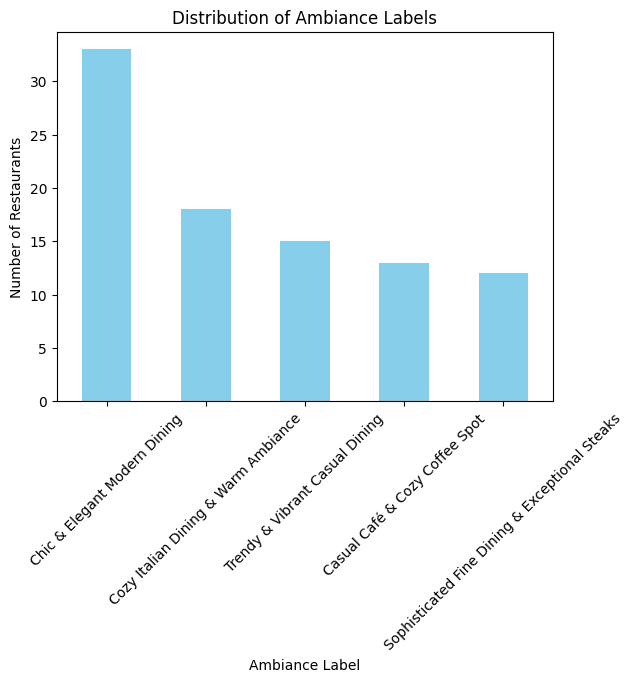

In [59]:
# Plotting the distribution of ambiance labels
ambiance_counts = df['Ambiance_Label'].value_counts()
ambiance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ambiance Labels')
plt.xlabel('Ambiance Label')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_8276\3330382330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_suburbs.index, y=top_rated_suburbs.values, palette="coolwarm")


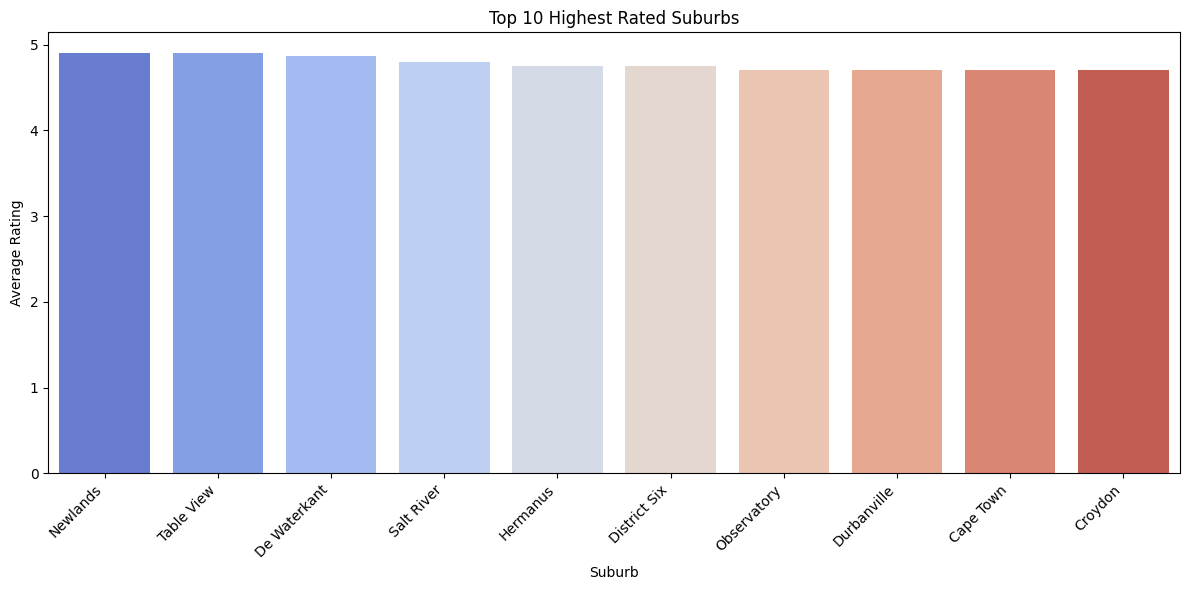

In [60]:
#Visualizing suburbs with the most top rated suburbs
suburb_columns = [col for col in df.columns if col.startswith('Suburb_')]

suburb_ratings = {}
for col in suburb_columns:
    suburb_name = col.replace('Suburb_', '')
    suburb_restaurants = df[df[col] == 1]
    if len(suburb_restaurants) > 0:  
        avg_rating = suburb_restaurants['Rating_Value'].mean()
        suburb_ratings[suburb_name] = avg_rating

suburb_rating_series = pd.Series(suburb_ratings)

top_rated_suburbs = suburb_rating_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_suburbs.index, y=top_rated_suburbs.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Suburb")
plt.ylabel("Average Rating")
plt.title("Top 10 Highest Rated Suburbs")
plt.tight_layout()  
plt.show()

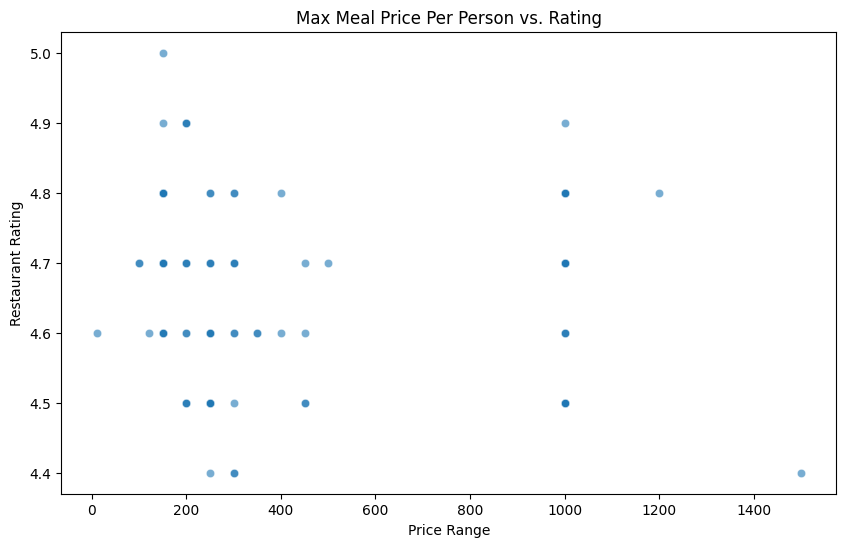

In [61]:
#Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_Max_Price'], y=df['Rating_Value'], alpha=0.6)
plt.xlabel("Price Range")
plt.ylabel("Restaurant Rating")
plt.title("Max Meal Price Per Person vs. Rating")
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_8276\3317392584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Review_Count'], palette="flare")


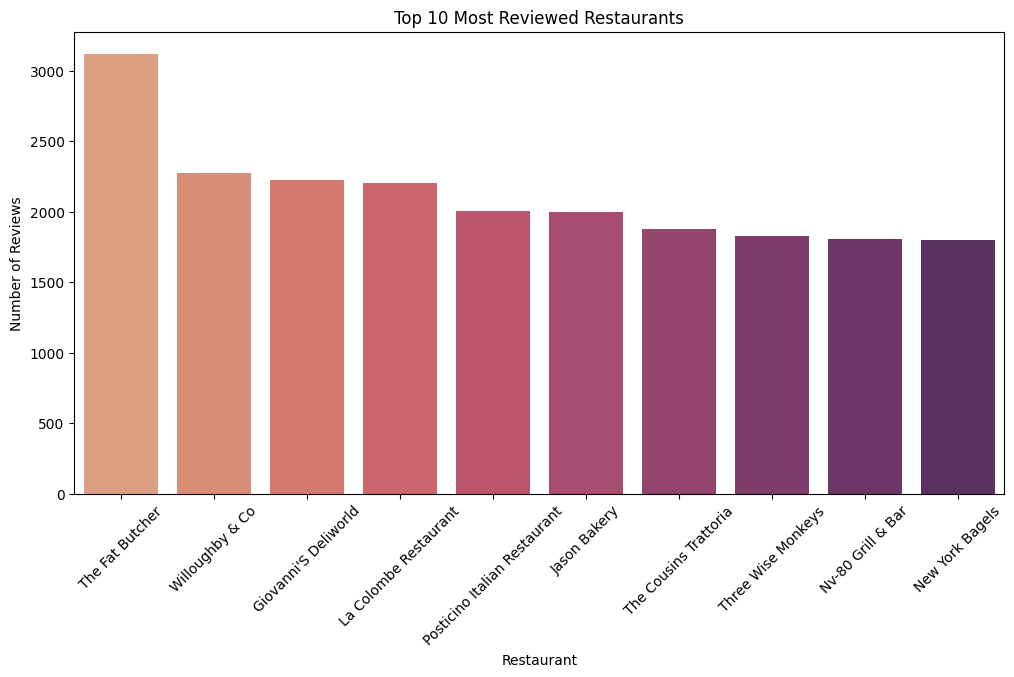

In [62]:
# Top 10 most reviewed restaurants
top_reviews = df[['Restaurant Name', 'Review_Count']].sort_values(by='Review_Count', ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Review_Count'], palette="flare")
plt.xticks(rotation=45)
plt.xlabel("Restaurant")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Restaurants")
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_8276\1233362678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="viridis")


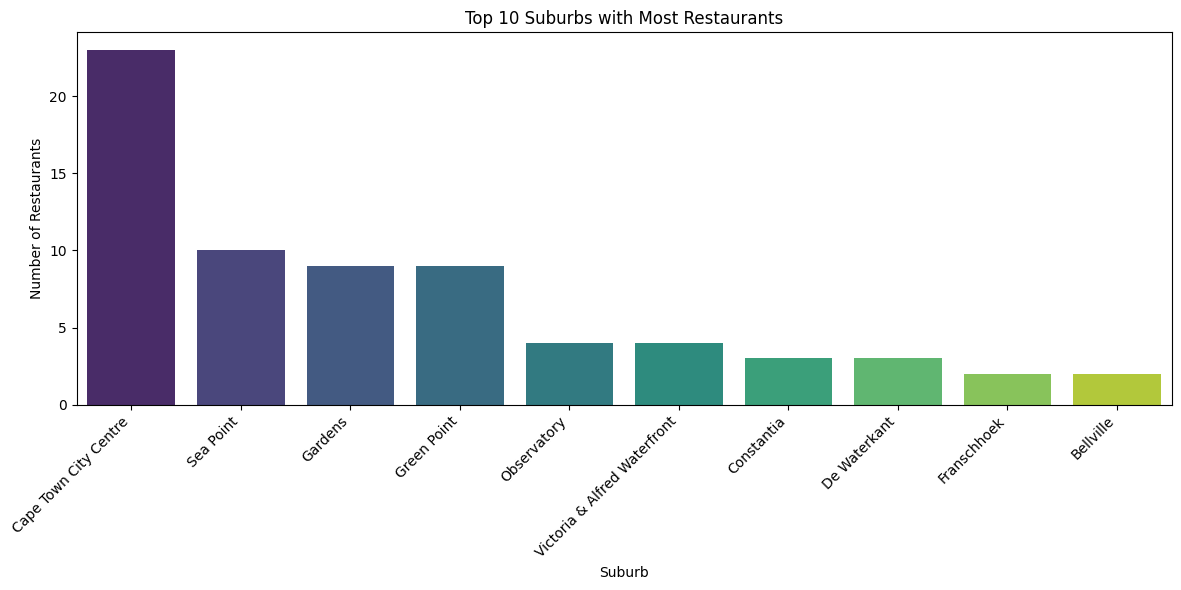

In [63]:
#Visualizing top 10 suburbs with the most amount restaurants
suburb_columns = [col for col in df.columns if col.startswith('Suburb_')]
suburb_counts = {}
for col in suburb_columns:
    suburb_name = col.replace('Suburb_', '')
    count = df[col].sum()
    suburb_counts[suburb_name] = count

suburb_series = pd.Series(suburb_counts)

top_suburbs = suburb_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Suburbs with Most Restaurants")
plt.tight_layout()  
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_8276\1876598865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Rating_Value'], palette="flare")


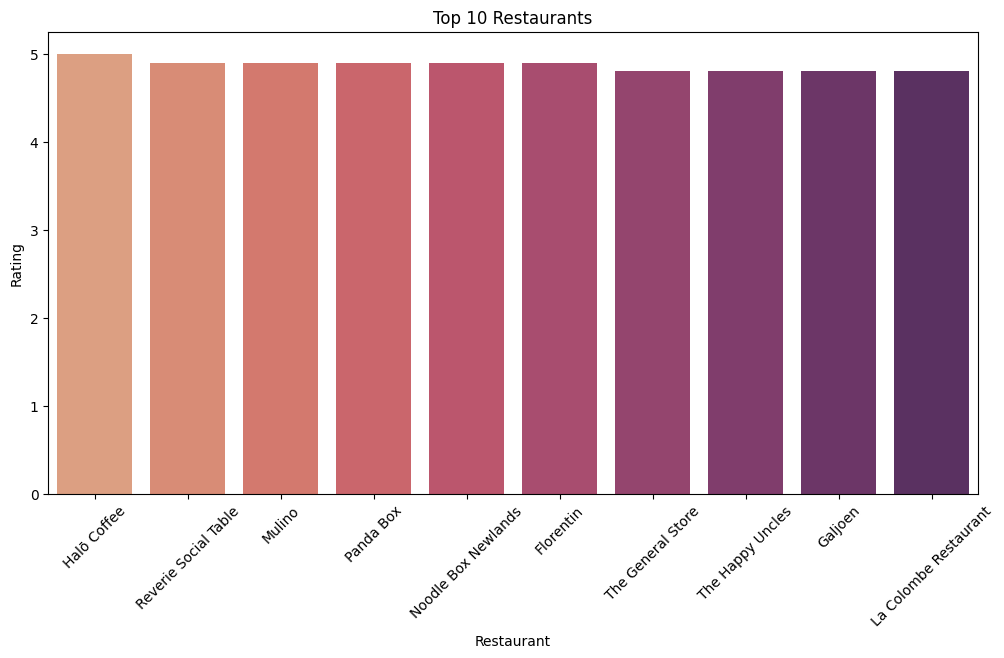

In [64]:
# Top 10 restaurants
top_reviews = df[['Restaurant Name', 'Rating_Value']].sort_values(by='Rating_Value', ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Rating_Value'], palette="flare")
plt.xticks(rotation=45)
plt.xlabel("Restaurant")
plt.ylabel("Rating")
plt.title("Top 10 Restaurants")
plt.show()

In [69]:
df.to_excel("cptcleaned.xlsx")
print("Excel file saved successfully!")

Excel file saved successfully!


In [70]:
df.to_csv("cptcleaned.csv")
print("CSV file saved successfully!")

CSV file saved successfully!
